# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('data.csv')
data

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,manufacturing,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry
0,1996,Afghanistan,NaN,NaN,NaN,NaN,4695426.0,145.6,NaN,NaN,...,NaN,NaN,NaN,18853437.0,NaN,48.870,12.964,NaN,NaN,NaN
1,1997,Afghanistan,NaN,NaN,NaN,NaN,4788255.0,141.2,NaN,NaN,...,NaN,NaN,NaN,19357126.0,NaN,48.833,12.655,-867540.0,NaN,NaN
2,1998,Afghanistan,NaN,NaN,NaN,NaN,4853675.0,136.9,NaN,NaN,...,NaN,NaN,NaN,19737765.0,NaN,48.688,12.348,NaN,NaN,NaN
3,1999,Afghanistan,NaN,NaN,NaN,NaN,4939405.0,132.8,NaN,NaN,...,NaN,NaN,NaN,20170844.0,NaN,48.419,12.037,NaN,NaN,NaN
4,2000,Afghanistan,NaN,NaN,NaN,NaN,5071018.0,128.7,NaN,NaN,...,NaN,NaN,NaN,20779953.0,NaN,48.021,11.718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,1.293485e+09,NaN,20.0,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09
5276,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,2.403507e+09,15.2,19.8,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09
5277,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,2.466380e+09,NaN,19.6,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09
5278,2014,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,2.454635e+09,14.7,17.7,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09


## Analysing missing data

In [3]:
data.isnull().sum()

year                               0
country                            0
gdp                              316
foreign_direct_investment       1924
gross_savings                   2335
unemployment                    2372
labor_force                      620
mortality_rate                   500
new_businesses_registered       4056
education_expenditure           1635
age_dependency_ratio             484
food_production_index            398
human_capital_index             5177
imports                          768
exports                          772
life_expectancy_birth            361
manufacturing                    954
tobacco_use                     4516
profit_tax                      2851
population                        26
literacy_rate                   3895
birth_rate                       268
death_rate                       279
migration                       4320
agriculture_forestry_fishing     681
industry                         717
dtype: int64

## Calculating GDP per capita

In [4]:
data['gdp_per_capita'] = data.gdp / data.population
data.tail()

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
5275,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,NaN,20.0,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09,1093.654002
5276,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,15.2,19.8,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1304.969802
5277,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,NaN,19.6,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1430.000818
5278,2014,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,14.7,17.7,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09,1434.899340
5279,2015,Zimbabwe,1.996312e+10,-399200000.0,-1.637758e+09,NaN,6587823.0,62.0,9055.0,343432693.6,...,NaN,17.6,13814629.0,NaN,33.981,8.673,NaN,1.653794e+09,4.463433e+09,1445.071062


## Dropping the data with missing GDP per capita

In [5]:
data.dropna(subset=['gdp_per_capita'], inplace=True)
data.shape

(4964, 27)

In [6]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

## Calculating change in GDP per capita

In [7]:
data_change = data.copy()
data_change['gdp_per_capita2'] = 0
data_change['gdp_per_capita2'][:-1] = data_change['gdp_per_capita'][1:]
data_change['gdp_per_capita_change'] = data_change.gdp_per_capita2 - data_change.gdp_per_capita
data_change.tail()

<ipython-input-7-4ec43fda0595>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_change['gdp_per_capita2'][:-1] = data_change['gdp_per_capita'][1:]


,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
4959,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09,1093.654002,1304.969802,211.315799
4960,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1304.969802,1430.000818,125.031016
4961,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1430.000818,1434.899340,4.898522
4962,2014,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09,1434.899340,1445.071062,10.171722
4963,2015,Zimbabwe,1.996312e+10,-399200000.0,-1.637758e+09,NaN,6587823.0,62.0,9055.0,343432693.6,...,13814629.0,NaN,33.981,8.673,NaN,1.653794e+09,4.463433e+09,1445.071062,0.000000,-1445.071062


In [8]:
data_change.iloc[:-1, 1:-3] = data_change.iloc[1:, 1:-3]
data_change.tail()

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
4959,2011,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1093.654002,1304.969802,211.315799
4960,2012,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1304.969802,1430.000818,125.031016
4961,2013,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09,1430.000818,1434.899340,4.898522
4962,2014,Zimbabwe,1.996312e+10,-399200000.0,-1.637758e+09,NaN,6587823.0,62.0,9055.0,343432693.6,...,13814629.0,NaN,33.981,8.673,NaN,1.653794e+09,4.463433e+09,1434.899340,1445.071062,10.171722
4963,2015,Zimbabwe,1.996312e+10,-399200000.0,-1.637758e+09,NaN,6587823.0,62.0,9055.0,343432693.6,...,13814629.0,NaN,33.981,8.673,NaN,1.653794e+09,4.463433e+09,1445.071062,0.000000,-1445.071062


In [9]:
data_change.set_index('year', inplace=True)
data_change.drop(2015, inplace=True)
data_change.reset_index(inplace=True)
data_change.year = data_change.year + 1
data_change

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
0,2003,Afghanistan,4.515559e+09,NaN,NaN,NaN,5886907.0,116.3,NaN,NaN,...,23680871.0,NaN,46.231,10.704,NaN,1.689670e+09,1.025522e+09,179.426611,190.683814,11.257203
1,2004,Afghanistan,5.226779e+09,NaN,NaN,NaN,6198355.0,112.1,NaN,NaN,...,24726684.0,NaN,45.507,10.356,NaN,1.553454e+09,1.370816e+09,190.683814,211.382117,20.698303
2,2005,Afghanistan,6.209138e+09,NaN,NaN,NaN,6483460.0,107.9,NaN,NaN,...,25654277.0,NaN,44.723,10.003,NaN,1.931964e+09,1.664800e+09,211.382117,242.031285,30.649168
3,2006,Afghanistan,6.971286e+09,NaN,NaN,NaN,6644359.0,103.7,NaN,NaN,...,26433049.0,NaN,43.870,9.645,NaN,1.996295e+09,1.966653e+09,242.031285,263.733692,21.702407
4,2007,Afghanistan,9.747880e+09,NaN,NaN,NaN,6770366.0,99.5,NaN,NaN,...,27100536.0,NaN,42.944,9.287,-1046361.0,2.934600e+09,2.620449e+09,263.733692,359.693238,95.959546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09,948.331854,1093.654002,145.322148
4708,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1093.654002,1304.969802,211.315799
4709,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1304.969802,1430.000818,125.031016
4710,2014,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09,1430.000818,1434.899340,4.898522


In [10]:
data.drop(['year', 'country', 'gdp'], axis=1, inplace=True)
data_change.drop(['year', 'country', 'gdp', 'gdp_per_capita', 'gdp_per_capita2'], axis=1, inplace=True)

## Plot of the target variable

Mean: 11962.181575678851
Standard Deviation: 19654.17102853882
Mean Absolute Deviation: 12953.537672132457


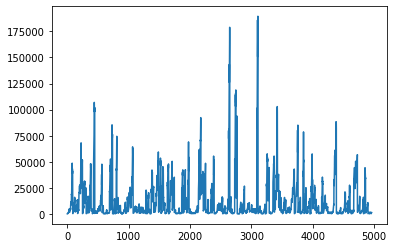

In [11]:
data.gdp_per_capita.plot()
print('Mean:', data.gdp_per_capita.mean())
print('Standard Deviation:', data.gdp_per_capita.std())
print('Mean Absolute Deviation:', data.gdp_per_capita.mad())

Mean: 388.5126814553989
Standard Deviation: 2625.5343966471187
Mean Absolute Deviation: 1101.805343057158


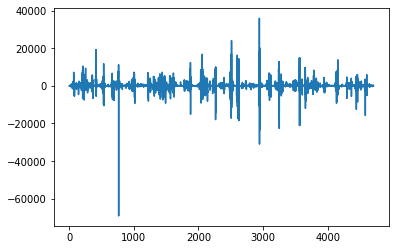

In [12]:
data_change.gdp_per_capita_change.plot()
print('Mean:', data_change.gdp_per_capita_change.mean())
print('Standard Deviation:', data_change.gdp_per_capita_change.std())
print('Mean Absolute Deviation:', data_change.gdp_per_capita_change.mad())

## Correlation heatmap between the variables

<AxesSubplot:>

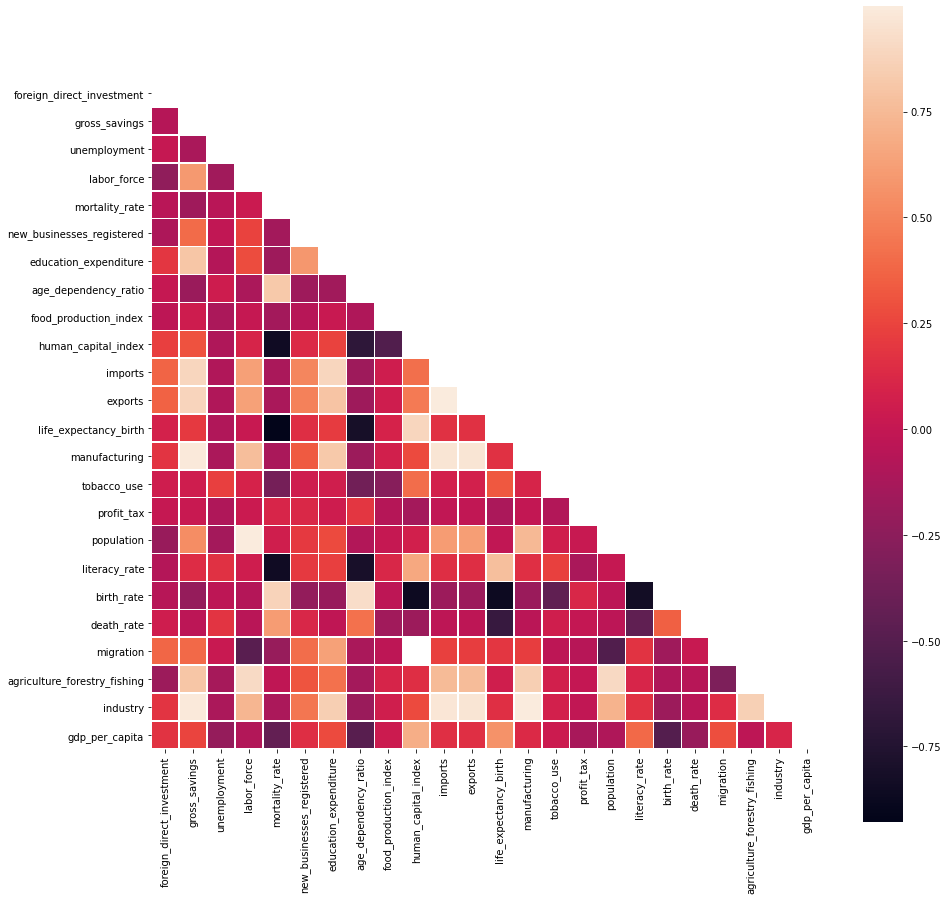

In [13]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), mask=matrix, square=True, linewidths=0.5)

<AxesSubplot:>

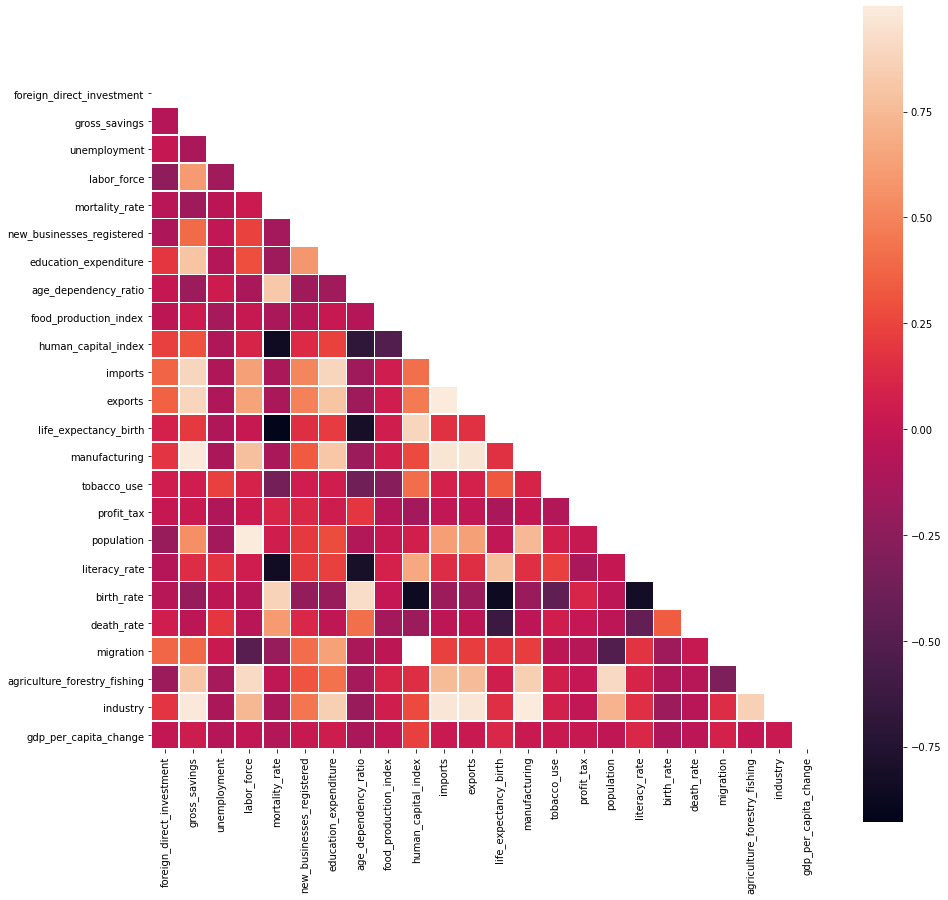

In [14]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data_change.corr())
sns.heatmap(data_change.corr(), mask=matrix, square=True, linewidths=0.5)

## Imputing the NaN values with averages

In [15]:
columns = data.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data = pd.DataFrame(imp.fit_transform(data), columns=columns)
data.head()

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,1.739573e+08,8.462438e+10,8.438023,5573458.0,120.4,28735.5,1.164406e+10,103.671183,95.55,0.593303,...,25.092807,16.66987,22600770.0,78.922721,46.901,11.048,744193.000000,1.566430e+09,9.655434e+08,179.426611
1,1.739573e+08,8.462438e+10,8.438023,5886907.0,116.3,28735.5,1.164406e+10,102.663238,98.77,0.593303,...,25.092807,16.66987,23680871.0,78.922721,46.231,10.704,-440402.018359,1.689670e+09,1.025522e+09,190.683814
2,1.739573e+08,8.462438e+10,8.438023,6198355.0,112.1,28735.5,1.164406e+10,101.562371,96.05,0.593303,...,25.092807,16.66987,24726684.0,78.922721,45.507,10.356,-440402.018359,1.553454e+09,1.370816e+09,211.382117
3,1.739573e+08,8.462438e+10,8.438023,6483460.0,107.9,28735.5,1.164406e+10,100.349127,106.32,0.593303,...,25.092807,0.00000,25654277.0,78.922721,44.723,10.003,-440402.018359,1.931964e+09,1.664800e+09,242.031285
4,1.739573e+08,8.462438e+10,8.438023,6644359.0,103.7,28735.5,1.164406e+10,100.970943,97.63,0.593303,...,25.092807,0.00000,26433049.0,78.922721,43.870,9.645,-440402.018359,1.996295e+09,1.966653e+09,263.733692


In [16]:
columns = data_change.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_change = pd.DataFrame(imp.fit_transform(data_change), columns=columns)
data_change.head()

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita_change
0,1.752828e+08,8.587249e+10,8.420387,5886907.0,116.3,28756.396396,1.185898e+10,102.663238,98.77,0.593303,...,25.047295,16.66987,23680871.0,79.222667,46.231,10.704,-4.426237e+05,1.689670e+09,1.025522e+09,11.257203
1,1.752828e+08,8.587249e+10,8.420387,6198355.0,112.1,28756.396396,1.185898e+10,101.562371,96.05,0.593303,...,25.047295,16.66987,24726684.0,79.222667,45.507,10.356,-4.426237e+05,1.553454e+09,1.370816e+09,20.698303
2,1.752828e+08,8.587249e+10,8.420387,6483460.0,107.9,28756.396396,1.185898e+10,100.349127,106.32,0.593303,...,25.047295,0.00000,25654277.0,79.222667,44.723,10.003,-4.426237e+05,1.931964e+09,1.664800e+09,30.649168
3,1.752828e+08,8.587249e+10,8.420387,6644359.0,103.7,28756.396396,1.185898e+10,100.970943,97.63,0.593303,...,25.047295,0.00000,26433049.0,79.222667,43.870,9.645,-4.426237e+05,1.996295e+09,1.966653e+09,21.702407
4,1.752828e+08,8.587249e+10,8.420387,6770366.0,99.5,28756.396396,1.185898e+10,101.600183,108.92,0.593303,...,25.047295,0.00000,27100536.0,79.222667,42.944,9.287,-1.046361e+06,2.934600e+09,2.620449e+09,95.959546


## Correlation heatmap between the variables

<AxesSubplot:>

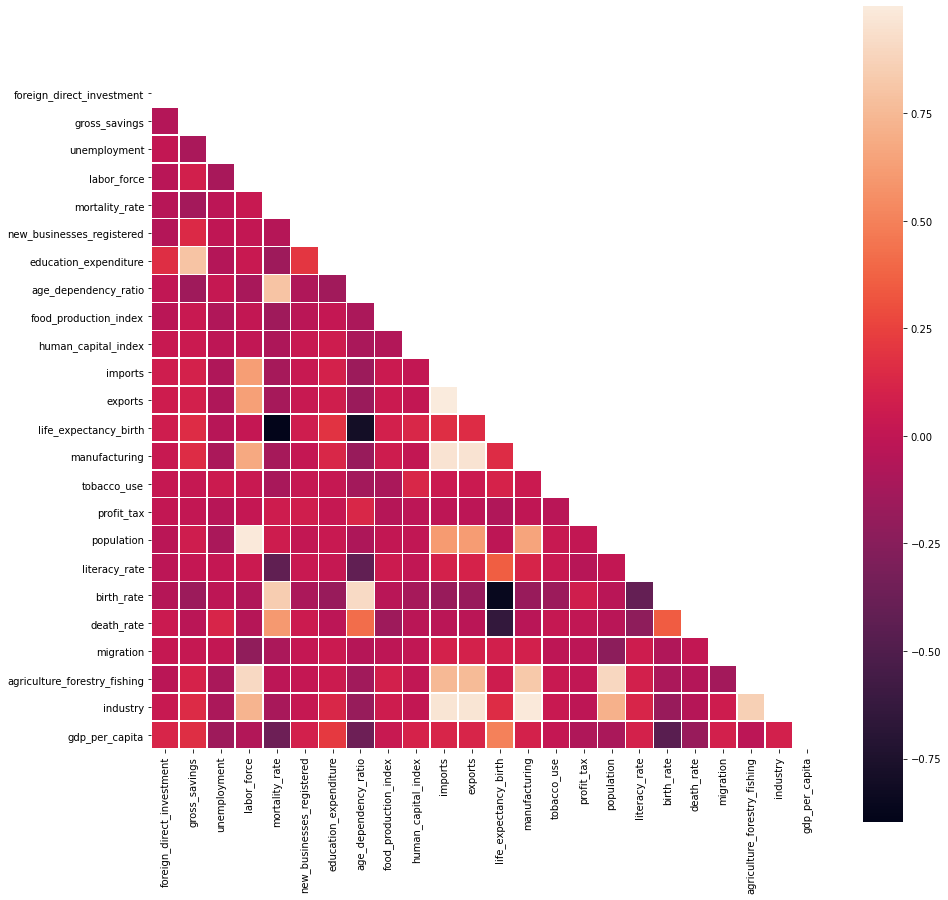

In [17]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), mask=matrix, square=True, linewidths=0.5)

<AxesSubplot:>

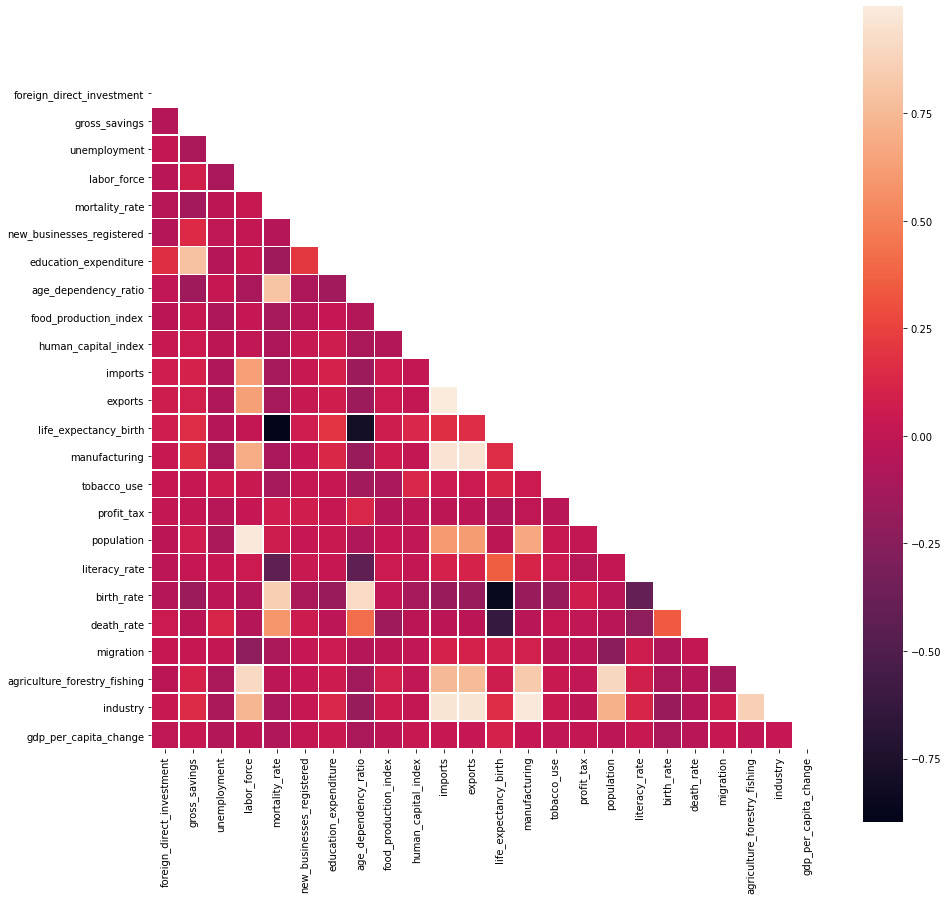

In [18]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data_change.corr())
sns.heatmap(data_change.corr(), mask=matrix, square=True, linewidths=0.5)

## Saving the data to a CSV file

In [19]:
data.to_csv('data_final.csv', index=False)
data_change.to_csv('data_change_final.csv', index=False)